In [1]:
%cd ..

/Users/stephenchen/projects/microlearning-project


/Users/stephenchen/opt/anaconda3/envs/microlearn/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: This is now an optional IPython functionality, setting dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets.mnist import MNIST

# from custom package
from src.utils import MNISTDatasets

torch.manual_seed(518)

### Setup for all tasks

In [3]:
# Not using for now
# Define a transformation pipeline for the MNIST dataset
# mnist_transform = transforms.Compose([
#     transforms.Resize((32, 32)),  # Resize the images to 32x32 pixels
#     transforms.ToTensor(),  # Convert images to PyTorch tensors
#     transforms.Normalize(mean=(0.1307,), std=(0.3081,))  # Normalize the images with mean and standard deviation
# ])
DATA_DIR = Path("data")
train = MNIST(DATA_DIR, transform=transforms.ToTensor(), train=True, download=True)
test = MNIST(DATA_DIR, transform=transforms.ToTensor(), train=False, download=True)
datasets = MNISTDatasets(train, test)

/Users/stephenchen/opt/anaconda3/envs/microlearn/lib/python3.11/site-packages/torchvision/datasets/mnist.py:66: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/Users/stephenchen/opt/anaconda3/envs/microlearn/lib/python3.11/site-packages/torchvision/datasets/mnist.py:71: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


## Ordinary Classification

shape of batch:  torch.Size([200, 28, 28])


Text(0.5, 1.0, 'Random digit: label=7')

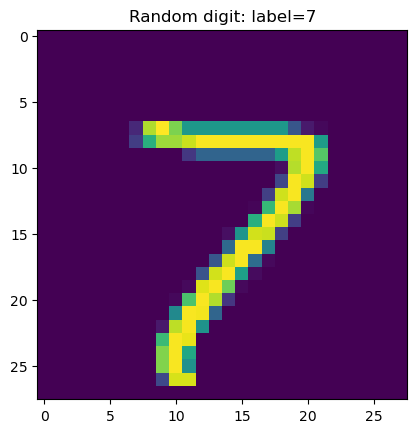

In [8]:
num_train = 50000
train_dset = datasets.get_standard_torch_dset("train", 50000)
random_obs = 5124
obs, label = train_dset[random_obs]
train_loader = DataLoader(train_dset, batch_size=200, shuffle=True)

for X_batch, Y_batch in train_loader:
    break

print("shape of batch: ", X_batch.shape)

plt.imshow(obs.numpy())
plt.title(f"Random digit: label={label.item()}")

## Pointer Value Retrieval (2x2 grid version)
Top left pointer value points to location:
- [0,1,2,3] -> Top right digit
- [4,5,6] -> Bottom left
- [7,8,9] -> Bottom right

Text(0.5, 1.0, 'Target label: 1')

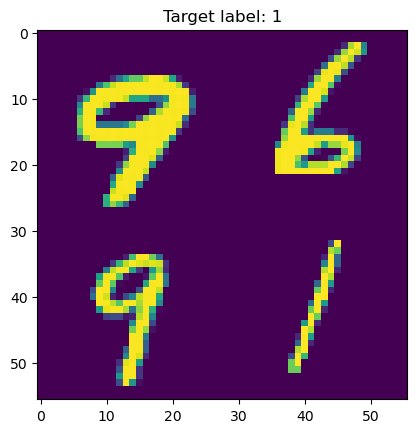

In [9]:
# output dsets are torch.utils.data.dataset.Subset with .dataset and .labels properties
# split: 50k train, 10k validation
num_train = 50000
train_dset, valid_dset = datasets.get_train_validation_split(num_train)
block_dset, labels = datasets.construct_block_dataset(train_dset.dataset,
                                                      train_dset.labels)
obs = np.random.randint(0, num_train)
plt.imshow(block_dset[obs].numpy())
plt.title(f"Target label: {labels[obs]}")